In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from dv import AedatFile
import pandas as pd
import sys

sys.path.append("../utils")
from dv_utils import *

%load_ext autoreload
%autoreload 2

In [2]:
aedat_dir = r"D:\Fight\rotation\Wei Zhang\projects\courtship song\data\aedat"
aedat_fname = 'dvSave-2022_04_02_02_51_00_bitcode_test.aedat4'

aedat_path = os.path.join(aedat_dir, aedat_fname)

In [4]:
with AedatFile(aedat_path) as f:
    # list all the names of streams in the file
    print(f.names)

    print(f['events'].size)


['events', 'frames', 'triggers']
(260, 346)


In [4]:
# with AedatFile(aedat_path) as f:
#     for frame in f['frames']:
#         img = frame.image
# roi = cv2.selectROI(img)
# cv2.destroyAllWindows()
roi = (211, 223, 55, 37)

In [34]:
with AedatFile(aedat_path) as f:

    packet = next(f['events'].numpy())
    ts, xs, ys, ps = tuple(zip(*packet))[:4]

In [44]:
with AedatFile(aedat_path) as f:

    ma=0
    it = f['events'].numpy()
    mi = min(tuple(zip(*next(it)))[0])
    for i, packet in enumerate(it):
        ts = tuple(zip(*packet))[0]
        if (i % 100 == 0):
            print("passing packet [" + str(i) + "], len = " + str(len(ts)))
        ma = max(ts)


passing packet [0], len = 10592
passing packet [100], len = 10017
passing packet [200], len = 10039
passing packet [300], len = 9985
passing packet [400], len = 10680
passing packet [500], len = 9968
passing packet [600], len = 10196
passing packet [700], len = 10677
passing packet [800], len = 10426
passing packet [900], len = 10232
passing packet [1000], len = 10071
passing packet [1100], len = 10493
passing packet [1200], len = 10529
passing packet [1300], len = 10161
passing packet [1400], len = 10418
passing packet [1500], len = 10320
passing packet [1600], len = 9946
passing packet [1700], len = 10222
passing packet [1800], len = 10705
passing packet [1900], len = 10345
passing packet [2000], len = 10472
passing packet [2100], len = 10571
passing packet [2200], len = 10448
passing packet [2300], len = 10075
passing packet [2400], len = 9908
passing packet [2500], len = 10256
passing packet [2600], len = 10905
passing packet [2700], len = 10263
passing packet [2800], len = 10296
p

In [12]:
fps = 5000
out = accumulate(aedat_path, fps=fps, roi=roi, tw_mode=True, tw=[3, 5])

passing packet [100]
passing packet [200]
passing packet [300]
passing packet [400]
Finishing bin [5000], time [1.0]s
passing packet [500]
Finishing bin [10000], time [2.0]s


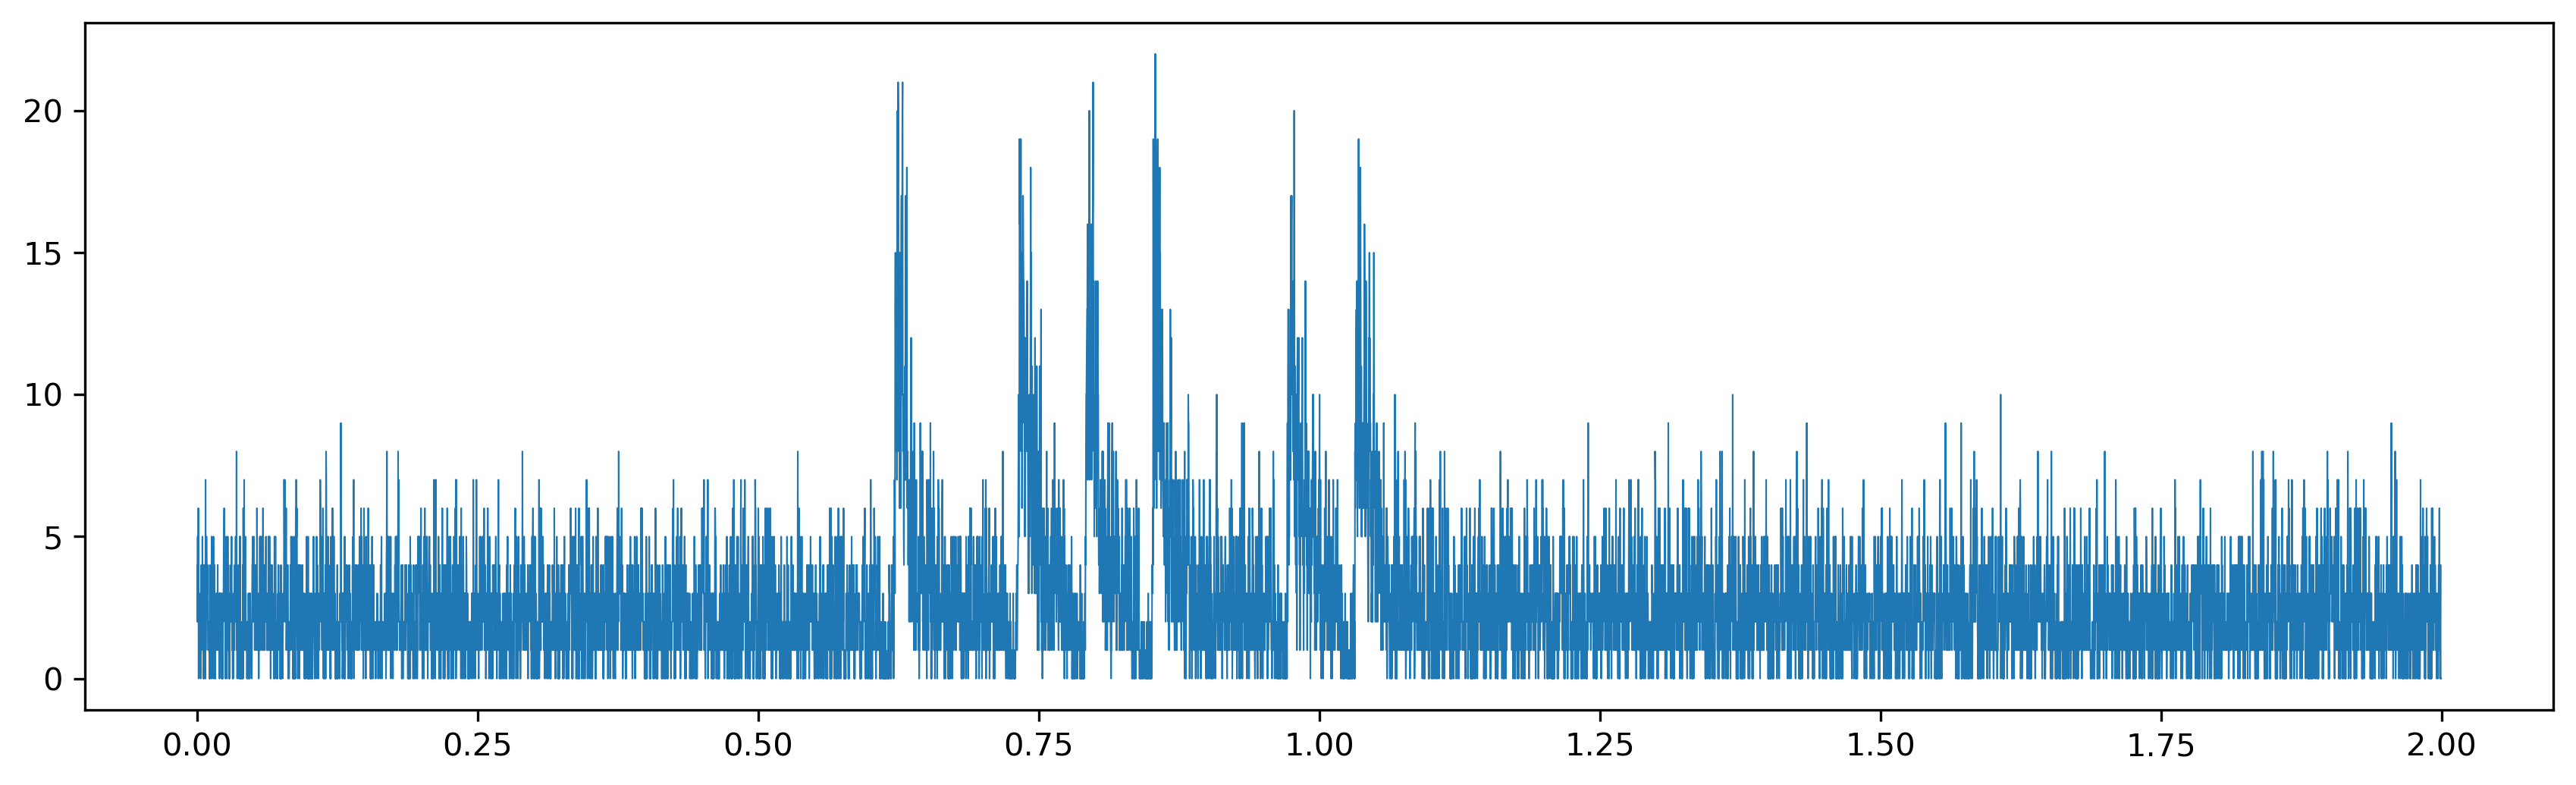

In [13]:
out = np.array(out)
plt.figure(figsize=[14,4], dpi=300)
plt.plot(np.arange(out.shape[0])/fps, out, linewidth=0.5)
plt.show()

In [33]:
save_path = os.path.join(aedat_dir, aedat_fname.split('.')[0] + '.csv')
save_info_path = os.path.join(aedat_dir, aedat_fname.split('.')[0] + '.txt')
np.savetxt(save_path, out, fmt='%d')
np.savetxt(save_info_path, np.array(['fps', fps]), fmt='%s')